In [19]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"

%run "$imports_path"

In [21]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [22]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "ctabGAN-qtr"

In [23]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, n_synthetic_datasets=None, **kwargs):
    hp_info = fetch_hp_info(method=METHOD_NAME)
    curr_image_dir = os.path.join(const.dir.images_hp_v2(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    if n_synthetic_datasets is None:
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v2(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        hyperparams_subname = curr_hp_info["hyperparams_subname"],
        subfolder=METHOD_NAME,
        n_synthetic_datasets = n_synthetic_datasets,
        save_dir = const.dir.images_hp_v2(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

  0%|          | 0/525 [00:00<?, ?it/s]

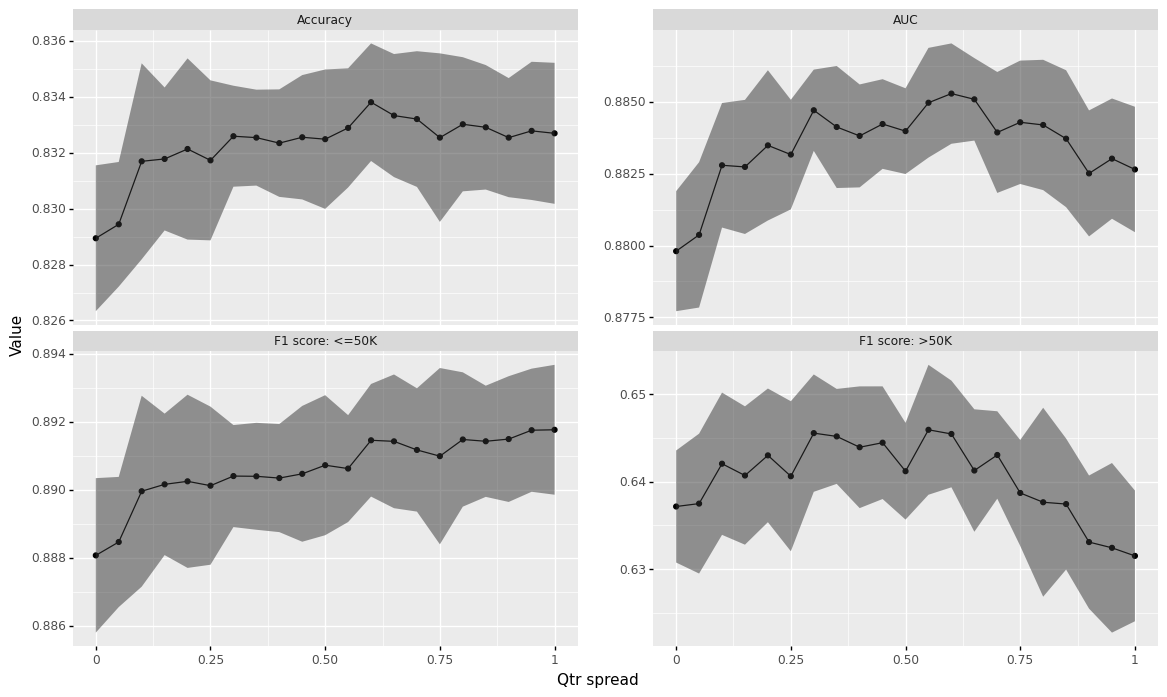

In [116]:
result_qtr_spread = plot_hp_tuning("qtr_spread")

In [ ]:
result_qtr_spread

  0%|          | 0/525 [00:00<?, ?it/s]

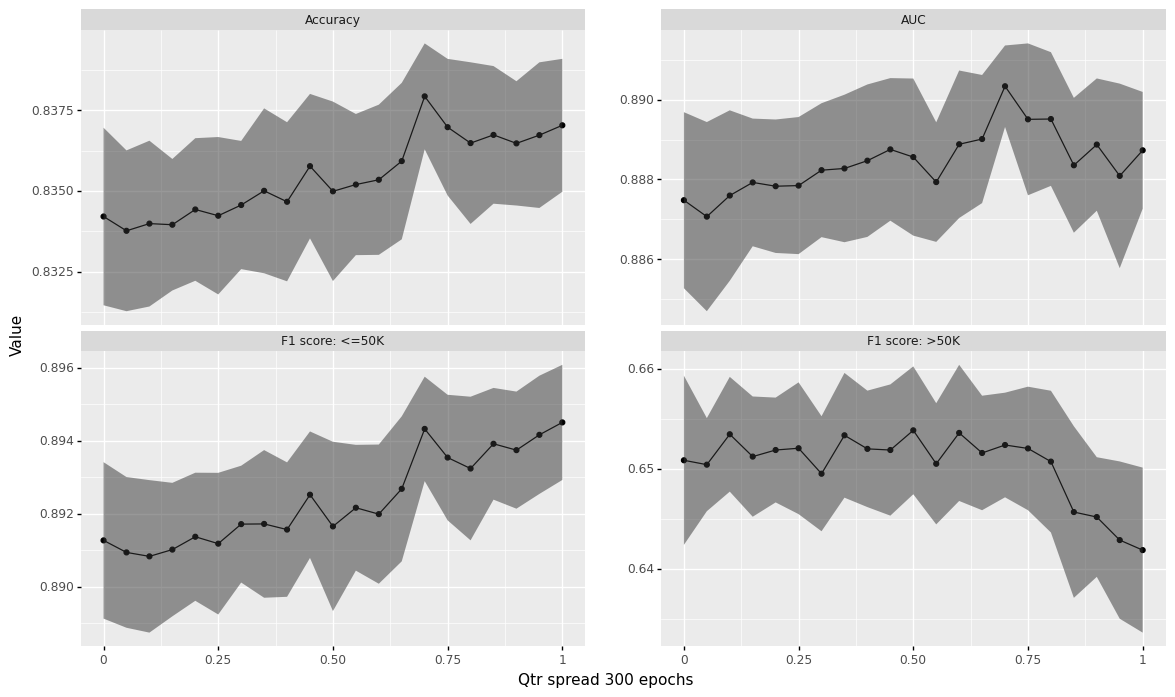

In [24]:
result_qtr_spread_300_epochs = plot_hp_tuning("qtr_spread_300_epochs")

In [25]:
result_qtr_spread_300_epochs 

,Qtr spread 300 epochs,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.834210,0.887479,0.771060,0.891275,0.650845,0.002754,0.002208,0.004472,0.002141,0.008461
1,0.05,0.833766,0.887068,0.770676,0.890945,0.650406,0.002494,0.002372,0.002631,0.002063,0.004657
2,0.10,0.833989,0.887596,0.772142,0.890837,0.653448,0.002571,0.002138,0.003162,0.002087,0.005740
3,0.15,0.833955,0.887925,0.771118,0.891023,0.651213,0.002040,0.001601,0.002886,0.001827,0.006014
4,0.20,0.834428,0.887830,0.771623,0.891374,0.651873,0.002211,0.001674,0.002898,0.001753,0.005241
5,0.25,0.834234,0.887846,0.771617,0.891185,0.652049,0.002441,0.001719,0.003534,0.001939,0.006590
6,0.30,0.834566,0.888233,0.770610,0.891720,0.649500,0.001988,0.001680,0.003006,0.001599,0.005754
7,0.35,0.835007,0.888276,0.772534,0.891725,0.653344,0.002557,0.001850,0.003432,0.002021,0.006238
8,0.40,0.834667,0.888471,0.771778,0.891570,0.651987,0.002467,0.001912,0.003373,0.001840,0.005824
9,0.45,0.835772,0.888754,0.772198,0.892525,0.651870,0.002241,0.001788,0.003514,0.001731,0.006563


  0%|          | 0/630 [00:00<?, ?it/s]

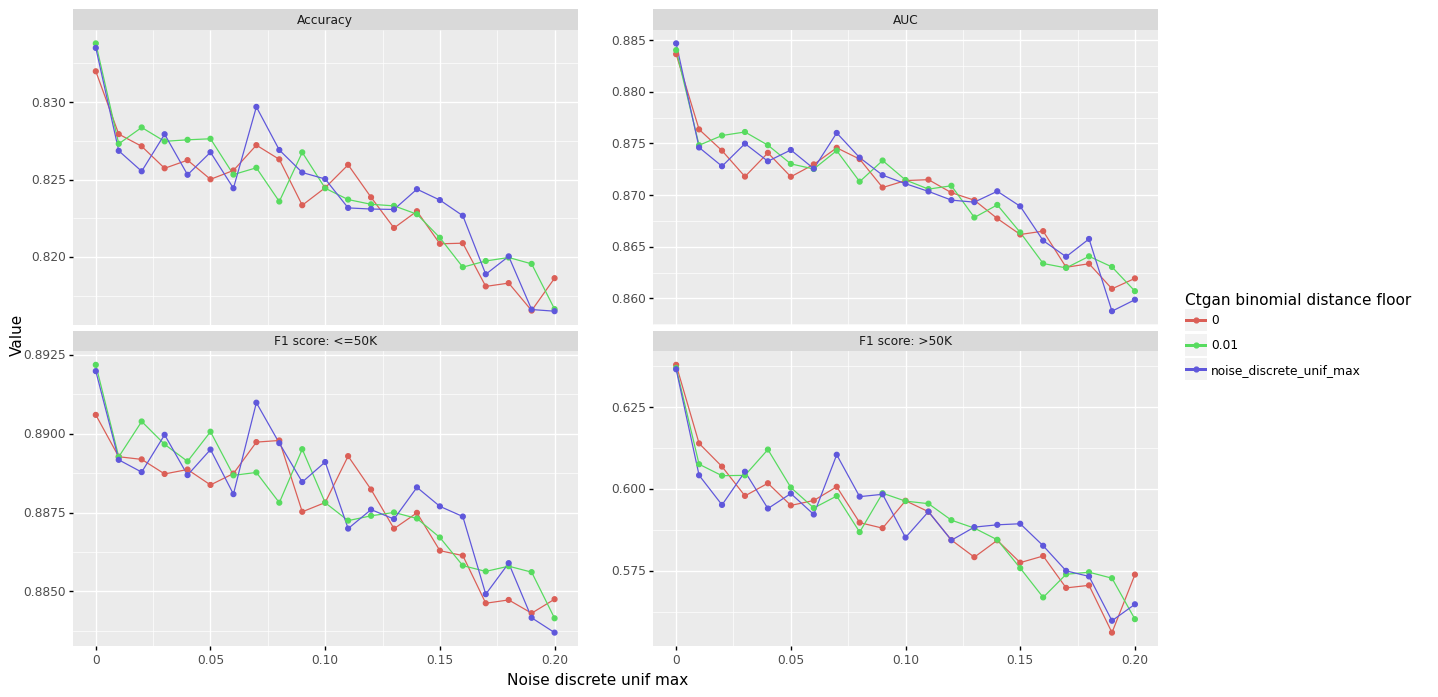

In [26]:
result_noise_ctgan = plot_hp_tuning("noise_ctgan")

In [27]:
result_noise_ctgan

,Noise discrete unif max,Ctgan binomial distance floor,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0,0.831992,0.883653,0.764251,0.890602,0.637900,0.002633,0.001999,0.001713,0.002343,0.003658
1,0.00,0.01,0.833792,0.884040,0.764571,0.892191,0.636950,0.001558,0.001234,0.005180,0.001378,0.010864
2,0.00,noise_discrete_unif_max,0.833499,0.884692,0.764271,0.891991,0.636550,0.001854,0.001959,0.003643,0.001670,0.007748
3,0.01,0,0.827935,0.876364,0.751607,0.889274,0.613940,0.001816,0.003052,0.005351,0.001329,0.010765
4,0.01,0.01,0.827311,0.874831,0.748426,0.889270,0.607582,0.002269,0.002298,0.006483,0.001444,0.012696
...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.19,0.01,0.819562,0.863048,0.729219,0.885610,0.572827,0.001904,0.001992,0.003304,0.001612,0.006917
59,0.19,noise_discrete_unif_max,0.816614,0.858762,0.722008,0.884161,0.559854,0.004015,0.005938,0.007807,0.002546,0.014013
60,0.20,0,0.818639,0.861940,0.729337,0.884751,0.573922,0.003853,0.004234,0.011257,0.002100,0.021525
61,0.20,0.01,0.816640,0.860701,0.722239,0.884145,0.560332,0.003383,0.004481,0.005172,0.002554,0.009760


  0%|          | 0/290 [00:00<?, ?it/s]

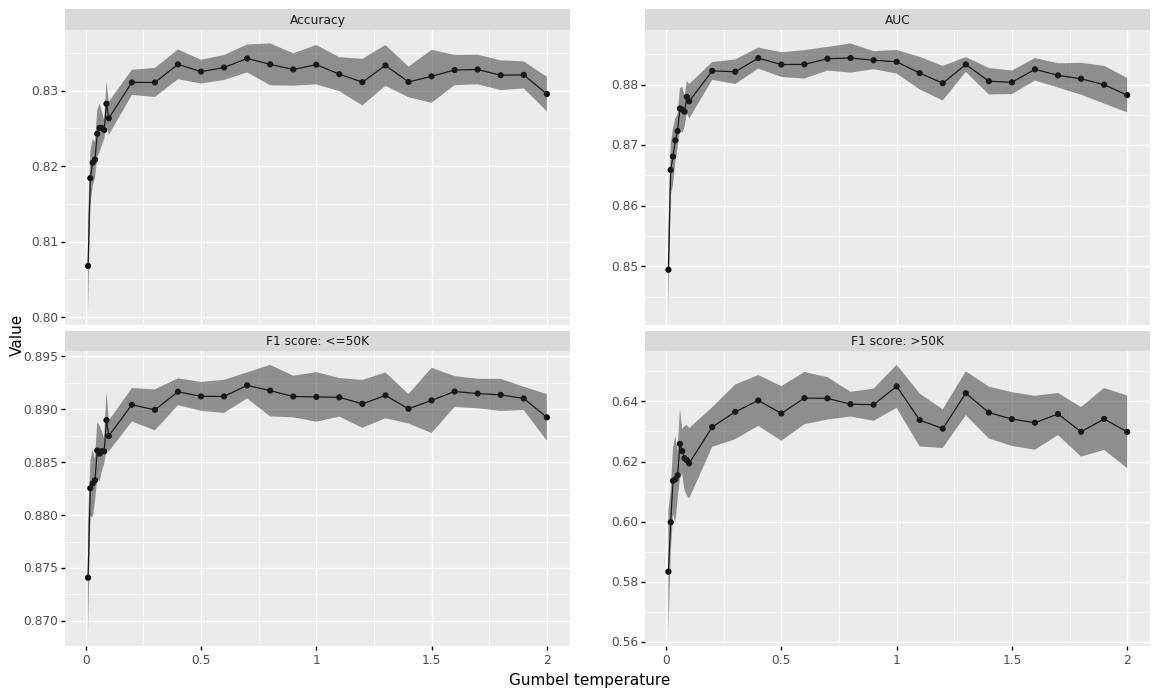

In [28]:
result_gumbel_temperature = plot_hp_tuning("gumbel_temperature")

In [29]:
result_gumbel_temperature

,Gumbel temperature,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.01,0.806786,0.849424,0.728738,0.874086,0.583390,0.005986,0.006841,0.009922,0.005190,0.020260
1,0.02,0.818420,0.865902,0.741183,0.882543,0.599822,0.003483,0.004199,0.005581,0.002573,0.010334
2,0.03,0.820465,0.868121,0.748296,0.882996,0.613595,0.003136,0.004705,0.004471,0.003228,0.010885
3,0.04,0.820863,0.870794,0.748699,0.883301,0.614098,0.002334,0.003596,0.006918,0.002030,0.014409
4,0.05,0.824303,0.872334,0.750788,0.886110,0.615467,0.003120,0.002778,0.003981,0.002656,0.007982
5,0.06,0.825080,0.876058,0.755843,0.885814,0.625871,0.003247,0.003312,0.005871,0.002658,0.011632
6,0.07,0.825060,0.875827,0.754753,0.886042,0.623464,0.002237,0.003846,0.003673,0.001867,0.007339
7,0.08,0.824807,0.875522,0.753570,0.886029,0.621112,0.001205,0.002550,0.005028,0.001210,0.010713
8,0.09,0.828267,0.877968,0.754714,0.888974,0.620453,0.003002,0.002640,0.005483,0.002742,0.011713
9,0.10,0.826341,0.877223,0.753432,0.887481,0.619384,0.002205,0.002856,0.005954,0.001462,0.011699


  0%|          | 0/75 [00:00<?, ?it/s]

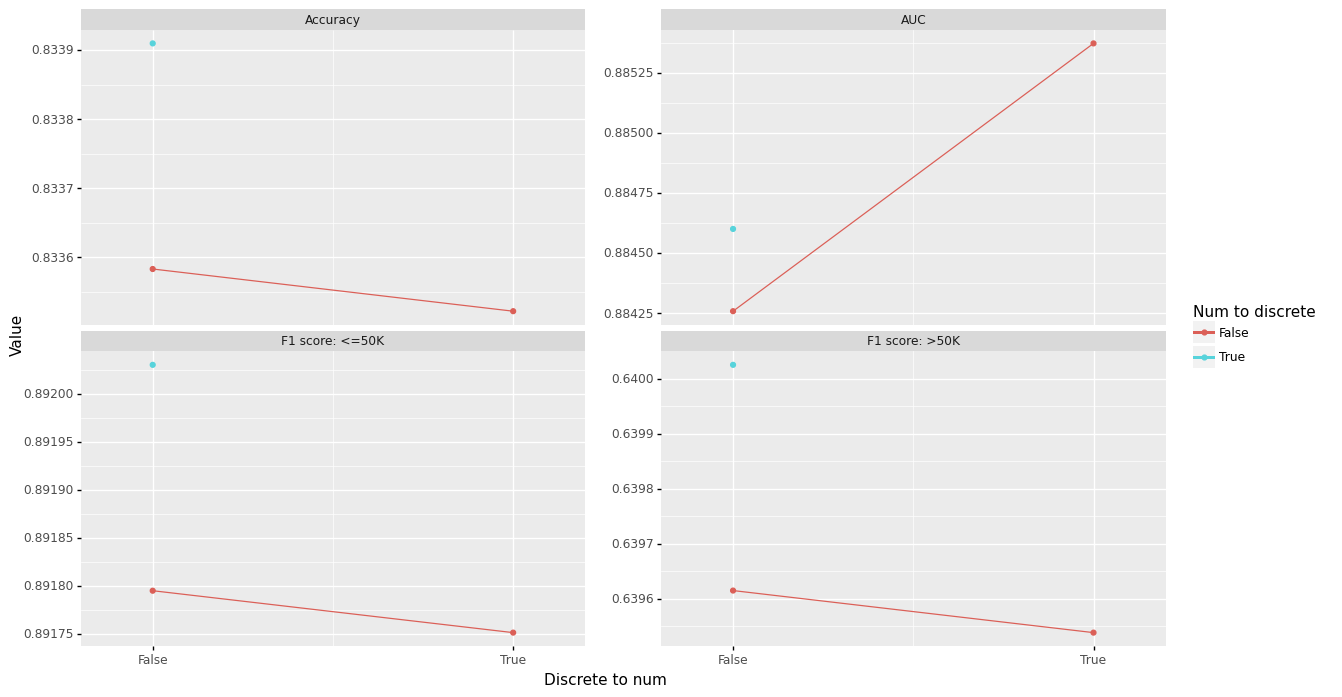

In [30]:
result_add_connection = plot_hp_tuning("add_connection")

In [31]:
result_add_connection

,Discrete to num,Num to discrete,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,False,False,0.833583,0.884258,0.765705,0.891795,0.639615,0.002679,0.002196,0.004251,0.002038,0.007925
1,False,True,0.833910,0.884600,0.766028,0.892030,0.640025,0.002710,0.002426,0.003934,0.002188,0.007588
2,True,False,0.833522,0.885372,0.765645,0.891751,0.639538,0.002367,0.001426,0.003576,0.001902,0.006854


  0%|          | 0/1890 [00:00<?, ?it/s]

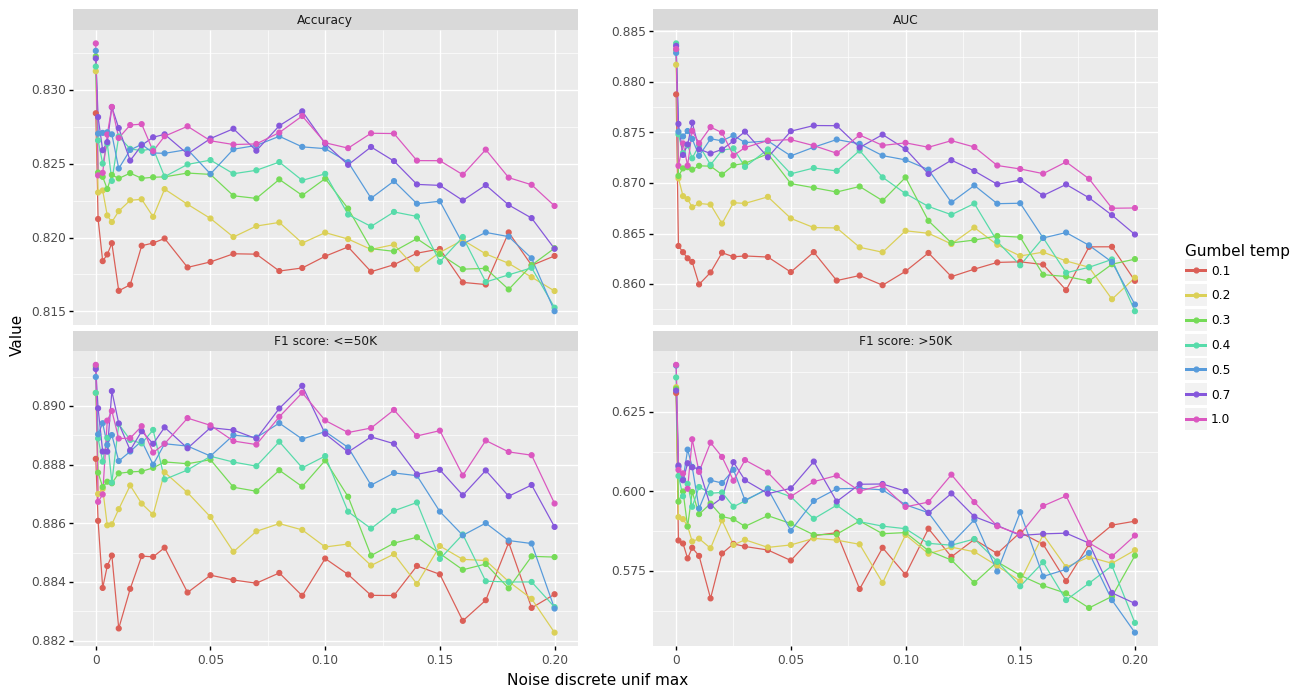

In [33]:
result_oh_encoding_choices = plot_hp_tuning("oh_encoding_choices")

In [34]:
result_oh_encoding_choices

,Noise discrete unif max,Gumbel temp,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.0,0.1,0.828426,0.878760,0.759590,0.888202,0.630978,0.002252,0.002770,0.004594,0.001865,0.009371
1,0.0,0.2,0.831275,0.881692,0.761627,0.890447,0.632807,0.001369,0.002276,0.003479,0.001504,0.007879
2,0.0,0.3,0.832284,0.883167,0.761860,0.891350,0.632370,0.002368,0.002349,0.004185,0.001646,0.007638
3,0.0,0.4,0.831594,0.883802,0.763168,0.890453,0.635882,0.002302,0.001387,0.003210,0.001858,0.006104
4,0.0,0.5,0.832656,0.882862,0.765312,0.890993,0.639630,0.002881,0.001603,0.003430,0.002594,0.007292
...,...,...,...,...,...,...,...,...,...,...,...,...
184,0.2,0.3,0.819283,0.862467,0.732338,0.884852,0.579824,0.002577,0.003550,0.007404,0.001710,0.014626
185,0.2,0.4,0.815252,0.857316,0.720905,0.883147,0.558662,0.003476,0.005227,0.007689,0.002323,0.014550
186,0.2,0.5,0.815013,0.857974,0.719346,0.883097,0.555596,0.004379,0.005721,0.014933,0.002434,0.029203
187,0.2,0.7,0.819243,0.864900,0.725329,0.885881,0.564777,0.003365,0.003847,0.010288,0.002093,0.020170


  0%|          | 0/225 [00:00<?, ?it/s]

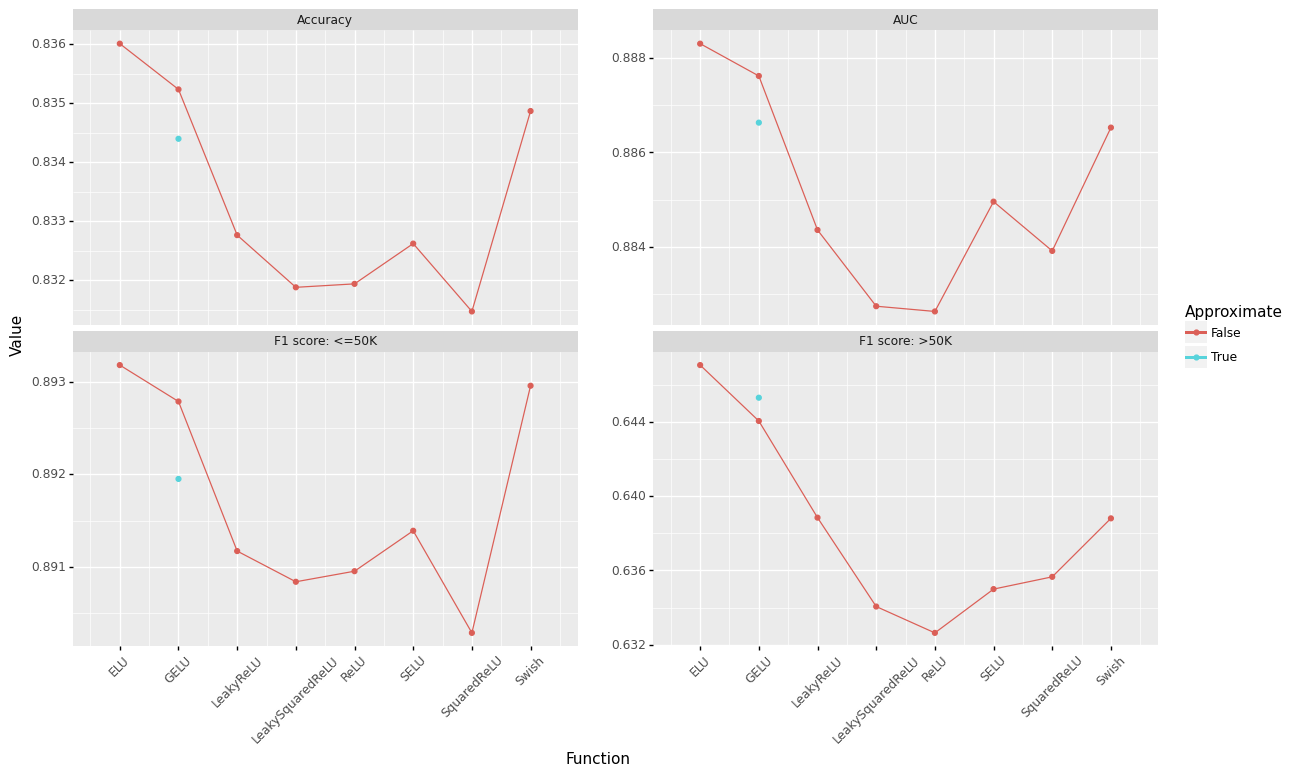

In [40]:
result_activation_function = plot_hp_tuning("activation_function", x_tick_angle=45)

In [36]:
result_activation_function

,Function,Approximate,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,ELU,False,0.836011,0.888301,0.770122,0.893181,0.647062,0.001936,0.001612,0.003306,0.001461,0.006231
1,GELU,False,0.835235,0.887617,0.768419,0.892787,0.644051,0.002599,0.001667,0.003098,0.002238,0.006167
2,GELU,True,0.834398,0.886630,0.768628,0.891950,0.645305,0.001913,0.001998,0.004101,0.001851,0.008894
3,LeakyReLU,False,0.832765,0.884359,0.765007,0.891170,0.638844,0.002521,0.002428,0.004527,0.001897,0.008637
4,LeakySquaredReLU,False,0.831880,0.882745,0.762447,0.890838,0.634056,0.002787,0.002845,0.006962,0.001869,0.013489
5,ReLU,False,0.831939,0.882634,0.761795,0.890953,0.632637,0.002400,0.002975,0.009678,0.002072,0.020064
6,SELU,False,0.832622,0.884958,0.763192,0.891390,0.634995,0.003364,0.002463,0.006231,0.002339,0.011494
7,SquaredReLU,False,0.831471,0.883915,0.762971,0.890286,0.635656,0.003427,0.002301,0.007921,0.003204,0.016825
8,Swish,False,0.834869,0.886525,0.765882,0.892958,0.638806,0.002602,0.001996,0.004053,0.001845,0.007149


  0%|          | 0/150 [00:00<?, ?it/s]

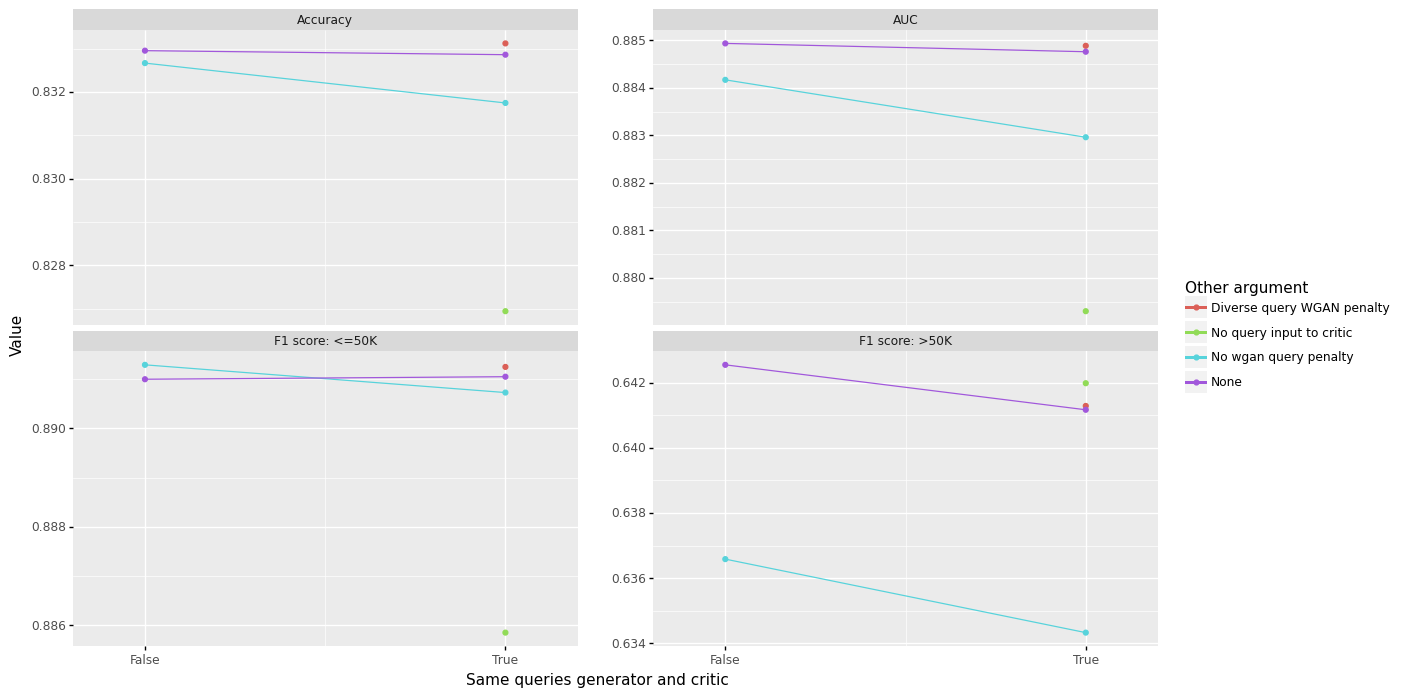

In [77]:
result_wgan_penalty_query = plot_hp_tuning("wgan_penalty_query")

In [72]:
result_wgan_penalty_query

,Same queries generator and critic,Other argument,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,False,No wgan query penalty,0.832667,0.884171,0.763935,0.891287,0.636583,0.002311,0.001980,0.003283,0.002065,0.006932
1,False,None,0.832954,0.884938,0.766771,0.890995,0.642547,0.001953,0.001623,0.003724,0.001515,0.007272


In [43]:
result_wgan_penalty_query

,Wgan penalty query,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,Different_queries_generator_and_critic,0.834212,0.884795,0.766326,0.892252,0.640400,0.002441,0.002074,0.003704,0.002046,0.007357
1,Different_queries_generator_and_critic_but_no_...,0.832853,0.883953,0.762984,0.891646,0.634323,0.002278,0.002396,0.004548,0.001756,0.008952
2,Different_queries_generator_and_critic_but_no_...,0.824486,0.876509,0.761963,0.883884,0.640041,0.004419,0.003040,0.005518,0.003920,0.010915
3,Same_queries_generator_and_critic,0.832781,0.883819,0.763875,0.891410,0.636339,0.002757,0.002150,0.004585,0.002063,0.008568
4,Same_queries_generator_and_critic_but_diverse_...,0.833007,0.884322,0.765000,0.891402,0.638598,0.002671,0.002361,0.004137,0.001985,0.007534
5,Same_queries_generator_and_critic_but_no_queri...,0.832531,0.884389,0.762860,0.891380,0.634341,0.002223,0.002274,0.004529,0.001567,0.008618
6,Same_queries_generator_and_critic_but_no_query...,0.826792,0.878557,0.764239,0.885633,0.642845,0.002913,0.003560,0.005006,0.002485,0.010097


  0%|          | 0/170 [00:00<?, ?it/s]

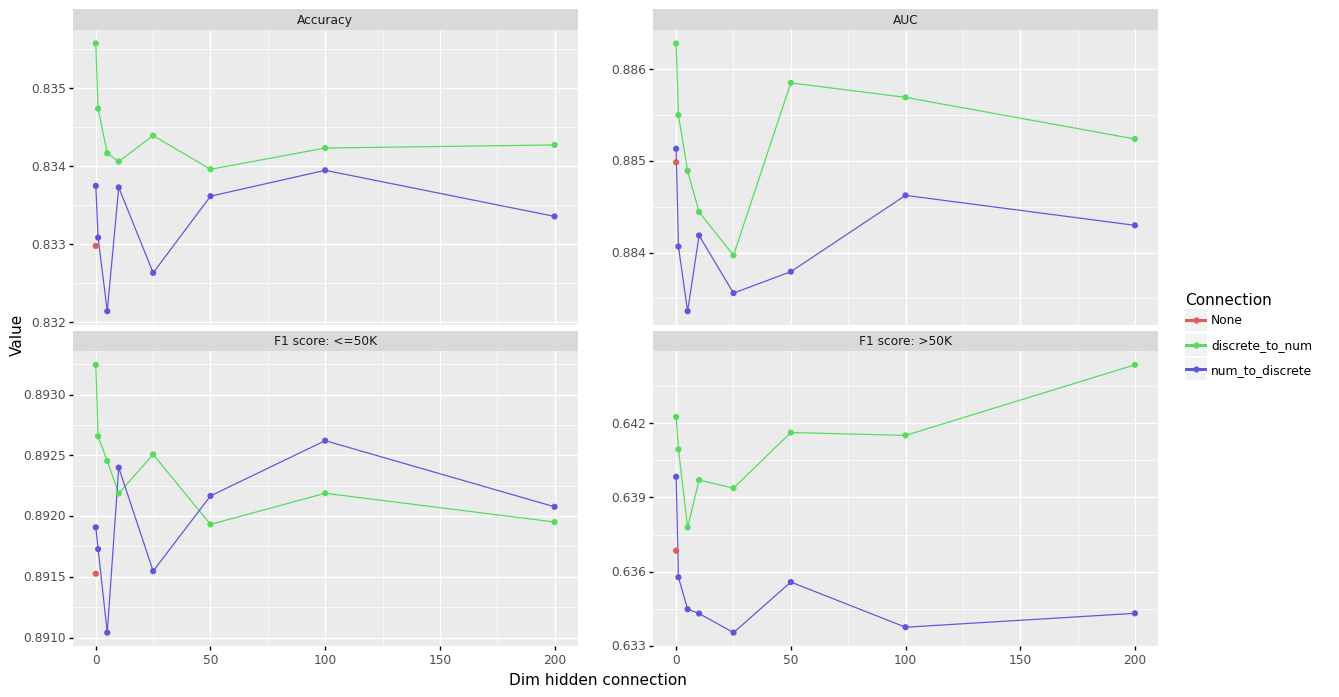

In [74]:
result_add_connection_advanced = plot_hp_tuning("add_connection_advanced")

In [75]:
result_add_connection_advanced

,Dim hidden connection,Connection,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0,None,0.832981,0.884986,0.764189,0.891525,0.636852,0.001224,0.001049,0.003893,0.001344,0.008564
1,0,discrete_to_num,0.835578,0.886282,0.767750,0.893246,0.642255,0.002577,0.002155,0.003679,0.001968,0.006712
2,0,num_to_discrete,0.833752,0.885134,0.765872,0.891908,0.639837,0.001859,0.001206,0.005165,0.001385,0.010419
3,1,discrete_to_num,0.834741,0.885500,0.766801,0.892657,0.640946,0.002818,0.002519,0.003968,0.002129,0.007070
4,1,num_to_discrete,0.833088,0.884067,0.763752,0.891728,0.635776,0.003256,0.002509,0.005545,0.002092,0.009543
5,5,discrete_to_num,0.834170,0.884892,0.765123,0.892454,0.637792,0.002085,0.001645,0.004172,0.001532,0.008051
6,5,num_to_discrete,0.832145,0.883362,0.762763,0.891040,0.634485,0.002226,0.001134,0.002863,0.001916,0.005860
7,10,discrete_to_num,0.834064,0.884443,0.765946,0.892187,0.639704,0.002023,0.001877,0.003035,0.001883,0.006683
8,10,num_to_discrete,0.833732,0.884187,0.763356,0.892399,0.634312,0.002931,0.002877,0.004558,0.001963,0.007709
9,25,discrete_to_num,0.834396,0.883970,0.765943,0.892508,0.639379,0.002620,0.002355,0.003607,0.001972,0.006377
